In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
file_name = 'r_200125_'

df_dict = {}
df_label_table = pd.read_excel('label_vesicle_id_table_200125_10.xlsx')
first_col_name = df_label_table.columns[0]
for i in range(min(df_label_table[first_col_name]), max(df_label_table[first_col_name])+1):
    current_file_name = file_name + str(i) + '.xlsx'
    df = pd.read_excel('r_200125/'+current_file_name)
    df_dict[i] = df

In [4]:
fps = 10000

In [5]:
n_row = max(df_label_table[first_col_name]) - min(df_label_table[first_col_name]) + 1
n_col = len(df_label_table.columns) - 1
df_vesicles = {}
start_row = min(df_label_table[first_col_name])
for i in range(n_col):
    df_vesicles[i] = np.empty((n_row, 2))
    df_vesicles[i][:] = np.nan
    df_vesicles[i][:, 0] =  range(min(df_label_table[first_col_name]), max(df_label_table[first_col_name])+1)
    for j in range(n_row):
        if not np.isnan(df_label_table[i][j]):
            df_vesicles[i][j, 1] = df_dict[start_row+j]['AR'].loc[int(df_label_table[i][j])-1]

In [7]:
aspect_ratio_summary = np.zeros((df_vesicles[0].shape[0], len(df_vesicles)))
for i, df in enumerate(df_vesicles):
    aspect_ratio_summary[:, i] = df_vesicles[i][:, 1]
aspect_ratio_summary[:, 18] = np.nan

In [16]:
df_vesicles[j][:, 0]

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199., 200.,
       201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211.,
       212., 213., 214., 215., 216., 217., 218., 219., 220., 221., 222.,
       223., 224., 225., 226., 227., 228., 229., 230., 231., 232., 233.,
       234., 235., 236., 237., 238., 239., 240., 241., 242., 243., 244.,
       245., 246., 247., 248., 249., 250.])

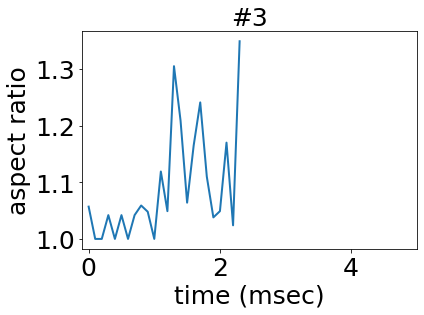

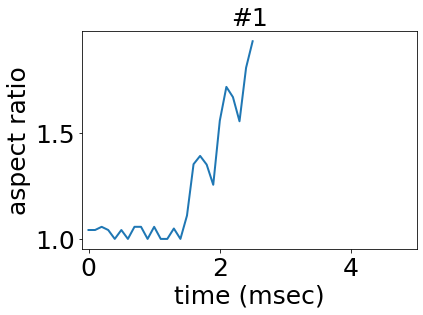

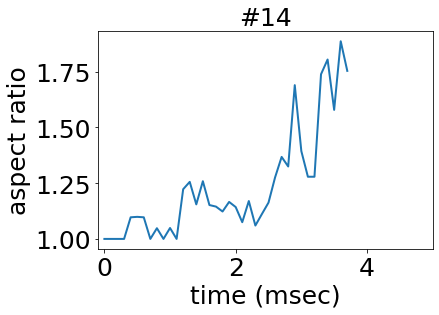

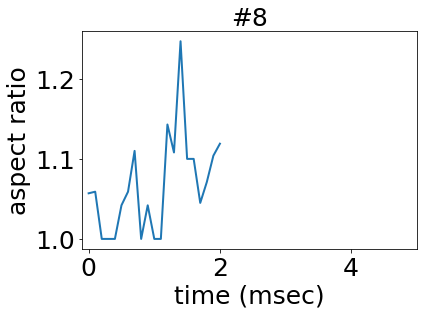

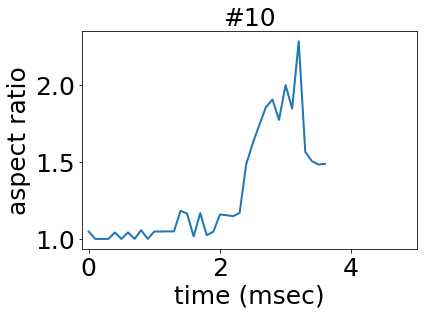

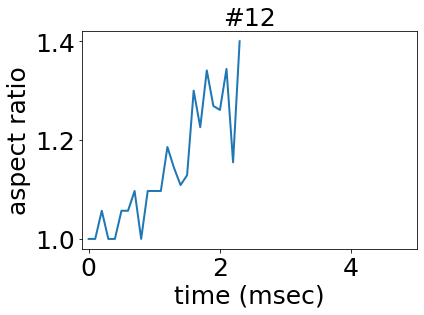

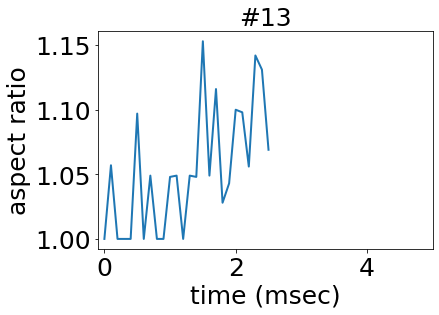

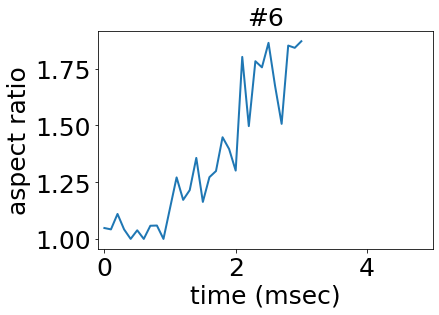

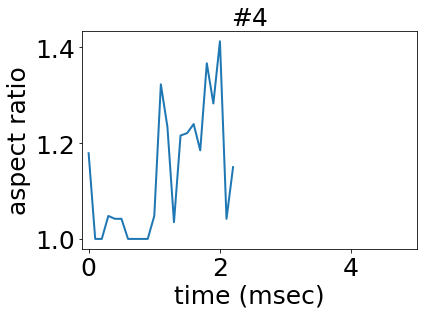

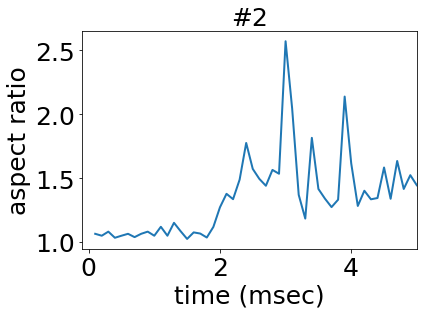

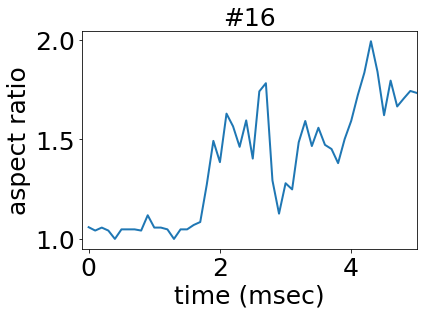

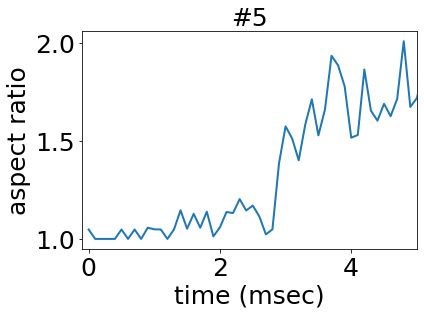

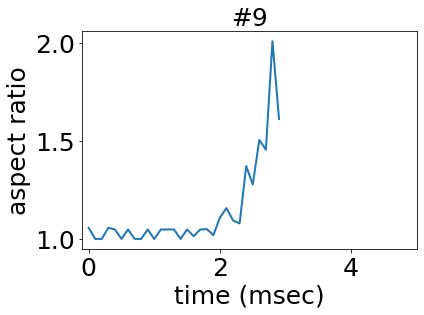

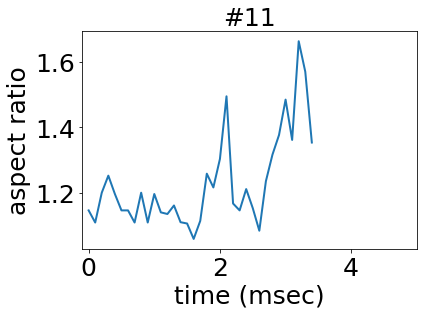

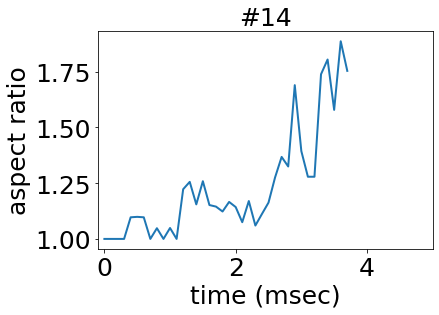

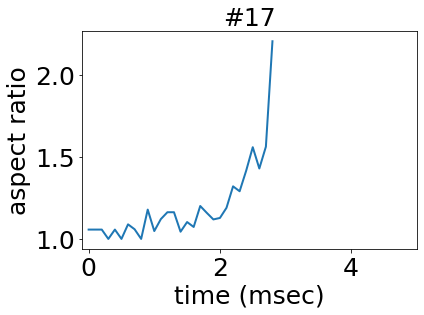

In [24]:
for j in [2,0,13,7,9,11,12,5,3,1,15,4,8,10,13,16]:
    fig = plt.figure()
    plt.plot((df_vesicles[j][:, 0]-190)*1/fps*1000, aspect_ratio_summary[:, j], lw = 2)
    plt.gca().tick_params(axis='both', labelsize = 25)
    plt.xlabel('time (msec)', fontsize = 25)
    plt.ylabel('aspect ratio', fontsize = 25)
    plt.title('#'+str(j+1), fontsize = 25)
    plt.xlim([-0.1,5])
    plt.savefig('Experimental_200125_'+str(j+1)+'.png', dpi = 400, bbox_inches = "tight")